In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('/content/bank-full.csv')

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
df.shape

(45211, 17)

In [20]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [21]:
df.drop(['job','marital','education','default','housing','loan','contact','day','month','poutcome',
         'duration'],inplace=True,axis = 1)



In [22]:
df.isnull().sum()

age         0
balance     0
campaign    0
pdays       0
previous    0
y           0
dtype: int64

In [23]:
df['outcome'] = df.y.replace({'yes': 1, 'no': 0})

In [24]:
df.head()

,age,balance,campaign,pdays,previous,y,outcome
0,58,2143,1,-1,0,no,0
1,44,29,1,-1,0,no,0
2,33,2,1,-1,0,no,0
3,47,1506,1,-1,0,no,0
4,33,1,1,-1,0,no,0


<Axes: >

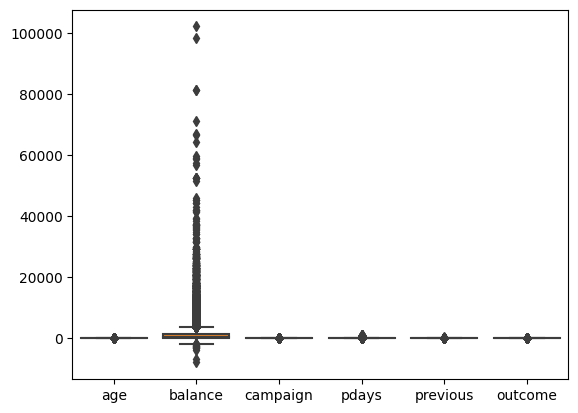

In [25]:
sns.boxplot(data =df,orient = "y")

<Axes: xlabel='age'>

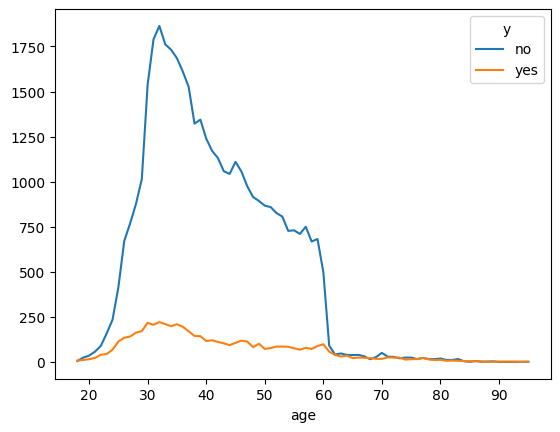

In [26]:
pd.crosstab(df.age,df.y).plot(kind="line")

<Axes: title={'center': 'age'}, xlabel='outcome'>

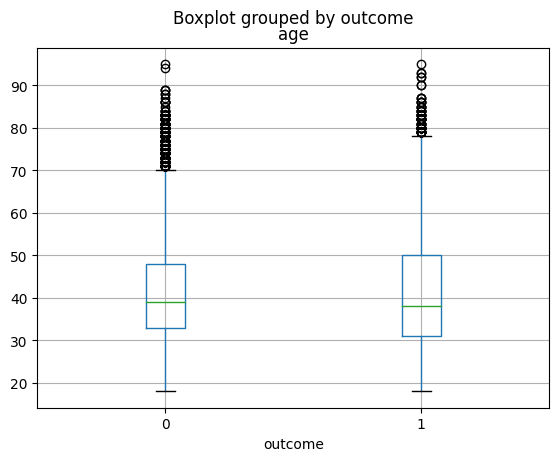

In [27]:

df.boxplot(column='age', by='outcome')

In [28]:
X = df.iloc[:,:-2]
X.head()

,age,balance,campaign,pdays,previous
0,58,2143,1,-1,0
1,44,29,1,-1,0
2,33,2,1,-1,0
3,47,1506,1,-1,0
4,33,1,1,-1,0


In [29]:
Y = df['outcome']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: outcome, dtype: int64

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter=45211)
classifier.fit(X,Y)

LogisticRegression(max_iter=45211)

In [31]:
classifier.coef_

array([[ 6.82457824e-03,  3.70696326e-05, -1.23756746e-01,
         1.66317871e-03,  7.27744234e-02]])

In [32]:
classifier.predict_proba (X)

array([[0.86411132, 0.13588868],
       [0.88327078, 0.11672922],
       [0.89088823, 0.10911177],
       ...,
       [0.83074613, 0.16925387],
       [0.90742889, 0.09257111],
       [0.72539555, 0.27460445]])

In [33]:
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
y_pred_df= pd.DataFrame({'actual_data': Y,'predicted_probality': y_pred})
y_pred_df

,actual_data,predicted_probality
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
confusion_matrix

array([[39885,    37],
       [ 5279,    10]])

In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.21      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.55      0.50      0.47     45211
weighted avg       0.80      0.88      0.83     45211



Text(0.5, 23.52222222222222, 'Predicted')

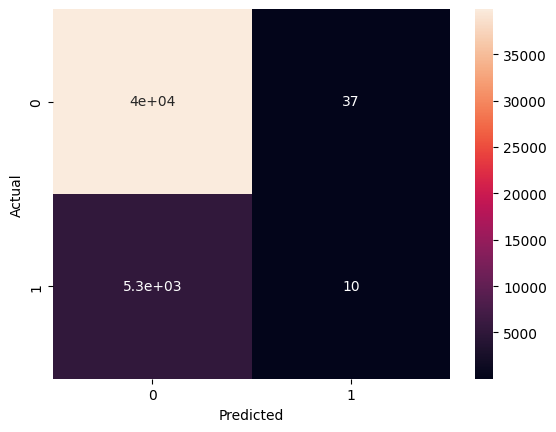

In [37]:
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [38]:
new_data=pd.DataFrame({'age':[35],"balance":[5000],"campaign":[1],"pdays":[-1],"previous":[0]})
new_pred=classifier.predict(new_data)
new_pred

array([0])

In [48]:
new_data['y']=val
new_data

,age,balance,campaign,pdays,previous,y
0,35,5000,1,-1,0,yes


In [49]:
val="."
if new_pred[0] == 0 :
   print("Yes, subscribed a term deposit")
   val="yes"
else:
   print("No, not subscribed a term deposit")
   val="no"

Yes, subscribed a term deposit


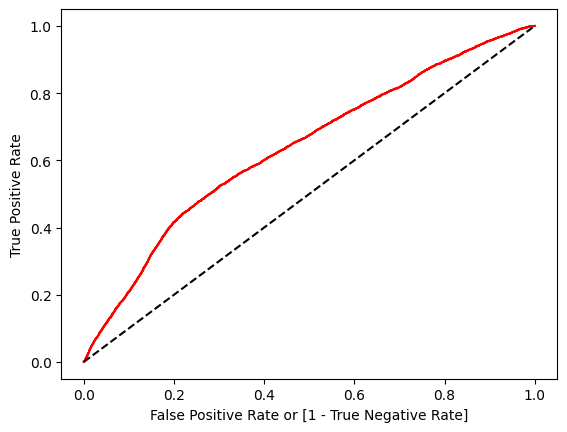

auc accuracy: 0.8824179956205348


In [50]:
# ROC Curve plotting and finding AUC value
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc=accuracy_score(Y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)